# Project 2 - Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [7]:
# imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('seaborn-v0_8-dark')


In [10]:
import os
os.getcwd()

'/home/jovyan/proj02-group08/notebooks'

In [11]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# example from class df = pd.read_csv(Path.home()/"shared/climate-data/monthly_in_situ_co2_mlo_cleaned.csv")
#pd.read_csv(Path.home()/"shared/climate-data/monthly_in_situ_co2_mlo_cleaned.csv")

sou = pd.read_csv(Path.home() / "proj02-group08" / "data" / "00_raw" / "SOTU.csv")



# show first few rows
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [12]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe
speeches_per_president_df = sou['President'].value_counts().sort_values(ascending=False).reset_index()
speeches_per_president_df.columns = ['President', 'Number of Speeches']

speeches_per_president_df.head()

,President,Number of Speeches
0,George Washington,12
1,Franklin D. Roosevelt,11
2,Dwight D. Eisenhower,10
3,Ronald Reagan,8
4,Theodore Roosevelt,8


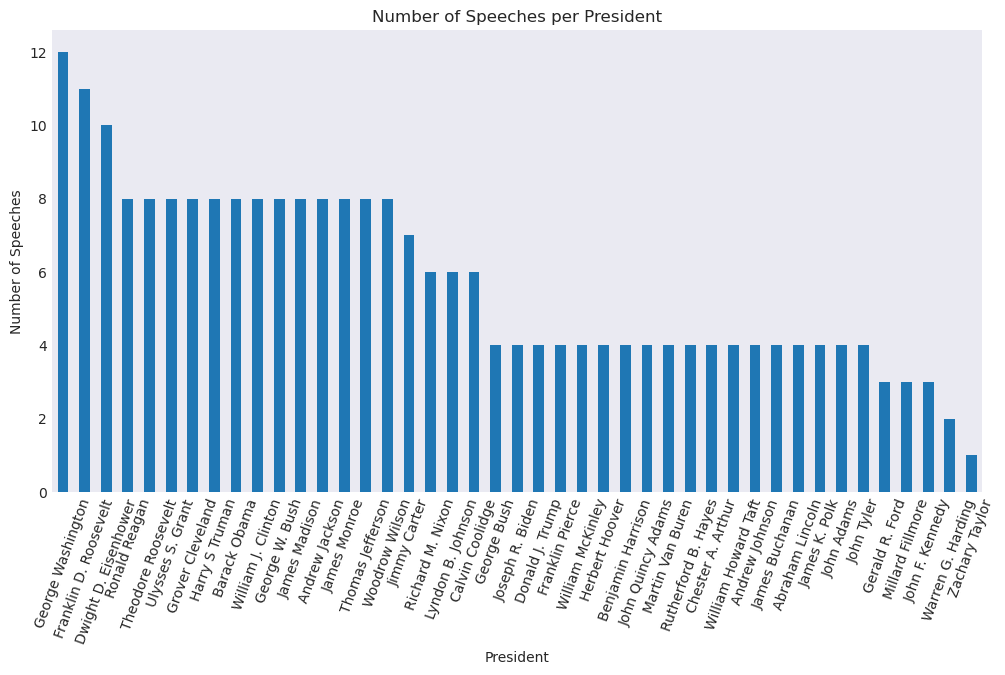

<Figure size 640x480 with 0 Axes>

In [16]:
speeches_per_president = sou['President'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
speeches_per_president.plot(kind='bar')

plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=70)
plt.show()

plt.savefig("../outputs/numberOfSpechesPerPresident.png", dpi=300, bbox_inches="tight")

#### Number of Speeches per Year

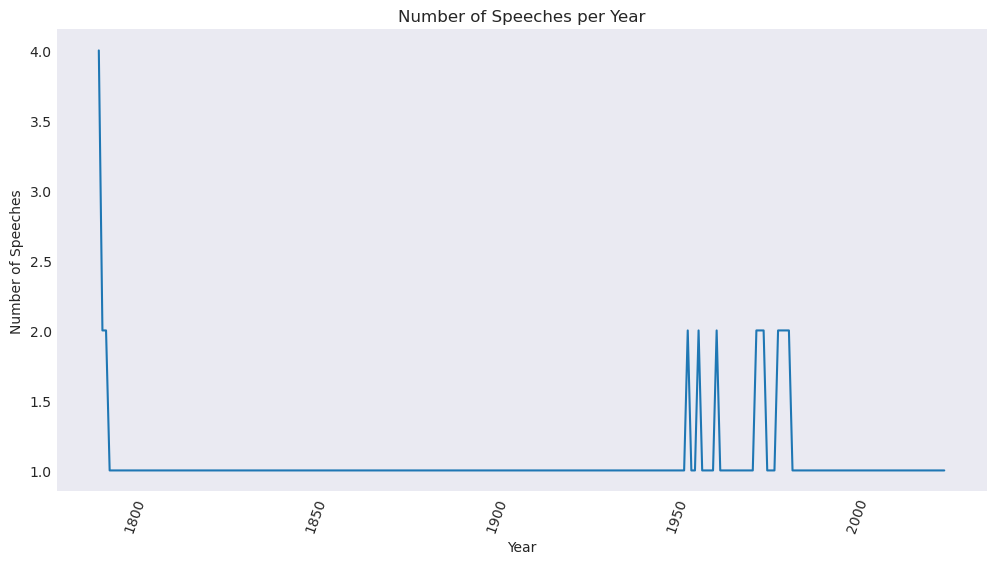

<Figure size 640x480 with 0 Axes>

In [18]:
speeches_per_year = sou['Year'].value_counts().sort_index()

# Display the Series
speeches_per_year

# Plot
plt.figure(figsize=(12,6))
speeches_per_year.plot(kind='line')

plt.title("Number of Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=70)
plt.show()

plt.savefig("../outputs/numberOfSpechesPerYear.png", dpi=300, bbox_inches="tight")

#### Word Count Distribution 

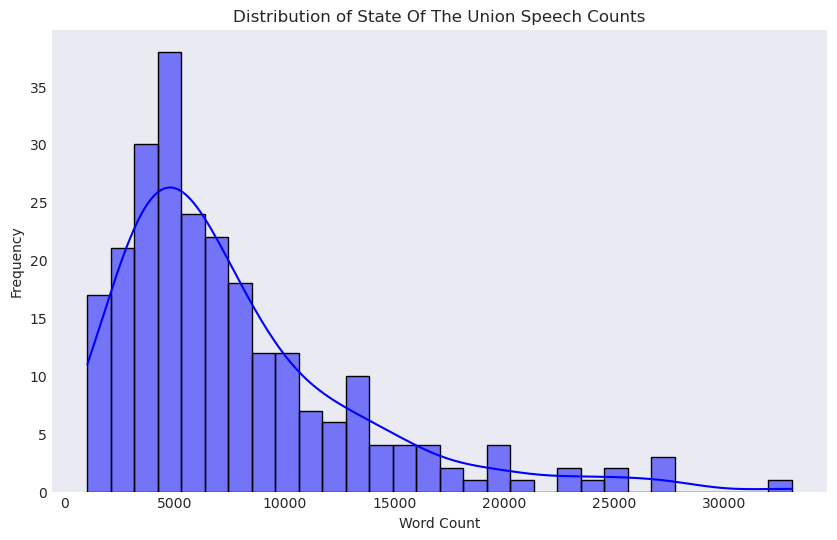

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(sou['Word Count'], kde=True, bins=30, color='blue')
plt.title("Distribution of State Of The Union Speech Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


plt.savefig("../outputs/DistributionOfState.png", dpi=300, bbox_inches="tight")

#### Word Count Distribution over Year

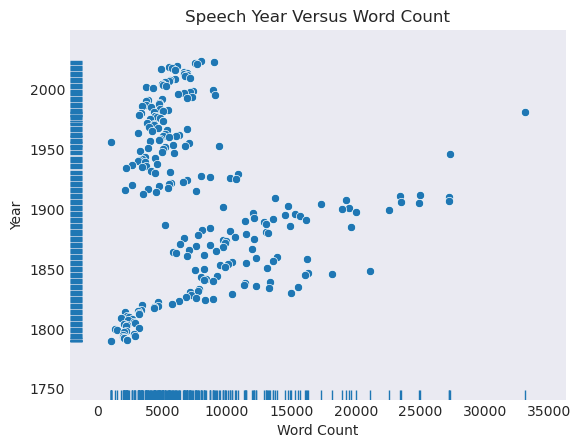

<Figure size 640x480 with 0 Axes>

In [20]:
# Hint: try seaborn.rugplot()
plt.figure()
sns.scatterplot(data=sou, x='Word Count', y='Year')
sns.rugplot(data=sou, x='Word Count', y='Year')
plt.title("Speech Year Versus Word Count")
plt.show()


plt.savefig("../outputs/SpeechYearVersusCount.png", dpi=300, bbox_inches="tight")

#### Word Count Distribution per President

In [9]:
avg_word_count = sou.groupby('President')['Word Count'].mean().sort_values(ascending=False)

# display
avg_word_count

President
William Howard Taft      22335.750000
Theodore Roosevelt       19505.125000
William McKinley         18380.000000
James K. Polk            17885.750000
James Buchanan           13993.000000
Grover Cleveland         13798.250000
Benjamin Harrison        13507.500000
Martin Van Buren         11261.250000
Andrew Jackson           11160.500000
Rutherford B. Hayes      10784.000000
Millard Fillmore         10414.000000
Franklin Pierce          10377.000000
Chester A. Arthur        10031.250000
Andrew Johnson            9485.500000
Ulysses S. Grant          8879.375000
Calvin Coolidge           8529.833333
John Tyler                8457.500000
Harry S Truman            8131.625000
Joseph R. Biden           8063.500000
Jimmy Carter              7874.714286
John Quincy Adams         7662.500000
Zachary Taylor            7559.000000
William J. Clinton        7457.625000
Abraham Lincoln           6746.250000
Barack Obama              6624.000000
Herbert Hoover            6251.500000
Wa

In [21]:
plt.figure(figsize=(12,6))
avg_word_count.plot(kind='bar', color='skyblue')
plt.title("Average Word Count per President")
plt.xlabel("President")
plt.ylabel("Average Word Count")
plt.xticks(rotation=70)
plt.show()


plt.savefig("../outputs/AverageWordCount.png", dpi=300, bbox_inches="tight")

NameError: name 'avg_word_count' is not defined

<Figure size 1200x600 with 0 Axes>

The average word count per president highlights how speech lengths have varied throughout history. Early presidents generally gave shorter addresses, while some nineteenth-century presidents, like James K. Polk, and a few early twentieth-century leaders delivered very long speeches. Modern presidents typically fall in the mid-range, between four and eight thousand words. Overall, speech length does not follow a consistent trend over time, but instead varies by individual president and historical era.

# Number of Speeches per President
This chart shows the number of speeches recorded for each U.S. president in the State of the Union dataset. George Washington appears with the highest count because he delivered multiple formal addresses at the beginning of the nation’s history, establishing the tradition of presidential messages to Congress. Early presidents often gave more frequent written or spoken addresses, and the dataset captures these as separate speeches. As a result, Washington naturally rises to the top in total speech count.

# Number of State of the Union Speechs per Year
this graph shows the number of State of the Union speeches delivered each year. The trend remains relatively steady overall, but there is a noticeable peak between 1950 and 2000. This increase reflects a period of major political activity—such as the Cold War, civil rights movement, and significant economic transitions—when presidents delivered more frequent and detailed annual messages to Congress. The elevated speech counts during these decades capture how national and global events shaped the intensity of presidential communication.

# Distribution of State of the Union Speech word counts
This chart shows the distribution of word counts across all State of the Union speeches. It highlights how speech length varies significantly between presidents and over time. Some speeches are relatively short and concise, while others are much longer, reflecting the context, historical period, and priorities of each administration. Analyzing word count distribution helps identify trends in presidential communication, such as shifts toward more detailed or policy-heavy addresses.

# Speech Year Versus Word Count
This graph shows how the word count of State of the Union speeches changes over time. It highlights trends in presidential communication, with some periods featuring shorter, more concise addresses and others marked by longer, more detailed speeches.